# Gaming Anxiety

Group Members:
- DE VEYRA, Ryan Cedric 
- GUBAT, Angeline Maris
- REYES, John Joseph
- SORIANO, Juancho Miguel

## I. Introduction and Dataset

The gaming community is expanding especially during the pandemic since people tend to prefer staying indoors and this form of entertainment in the form of electronic video games captivates the market of people who seek entertainment from the comfort of their own home. Video games tend to touch all aspects of sensory experiences through different mediums ranging from virtual reality to portable mobile devices. However, being in front of a screen for much longer than you usually would can have a number of unforeseen effects on someone that isn’t used to it, especially when playing a game they can get very engrossed in.

Needed imports for the visualizations:

In [1]:
import pandas as pd
import numpy as np 
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import seaborn as sns

The data to be used was taken from Kaggle user Divyansh Agrawal (https://www.kaggle.com/divyansh22/online-gaming-anxiety-data) but the original data was created/collected by Marian Sauter and Dejan Draschkow. In the dataset, the researchers interviewed and tested 13464 participants who have identified themselves as gamers. They were asked for their personal information such as their age, gender, birthplace, and occupation. The participants also gave game related information such as the number of hours they play, their playstyle, their reason for playing, and the game they play. The anxiety level of a participant could be measured using three psychology and wellness questionnaires called the "General Anxiety Disorder (GAD)", "Satisfaction with Life (SWL)", and the "Social Phobia Inventory (SPIN)" questionnaires.  

#### General Anxiety Disorder (GAD)
- Number of questions: 7
- Possible answers per question: 
    - 0 - Not at all

    - 1 - Several days 

    - 2 - More than half the days 

    - 3 - Nearly every day

- Score to anxiety correllation: Positive

#### Satisfaction with Life (SWL)
- Number of questions: 5
- Possible answers per question: 
    - 7 - Strongly agree

    - 6 - Agree

    - 5 - Slightly agree

    - 4 - Neither agree nor disagree

    - 3 - Slightly disagree

    - 2 - Disagree

    - 1 - Strongly disagree

- Score to anxiety correllation: Negative

#### Social Phobia Inventory (SPIN)
- Number of questions: 17
- Possible answers per question: 

    - 0 - Not At All 

    - 1 - A Little Bit	

    - 2 - Somewhat	

    - 3 - Very Much	

    - 4 - Extremely

- Score to anxiety correllation: Positive

In [2]:
url = 'https://raw.githubusercontent.com/angelinegubat/DATANVI-DATA/main/archive/GamingStudy_data.csv'
ga_df = pd.read_csv(url,encoding='latin1')  

# First 5 rows in the dataset:
ga_df.head()

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [3]:
ga_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. No.           13464 non-null  int64  
 1   Timestamp        13464 non-null  float64
 2   GAD1             13464 non-null  int64  
 3   GAD2             13464 non-null  int64  
 4   GAD3             13464 non-null  int64  
 5   GAD4             13464 non-null  int64  
 6   GAD5             13464 non-null  int64  
 7   GAD6             13464 non-null  int64  
 8   GAD7             13464 non-null  int64  
 9   GADE             12815 non-null  object 
 10  SWL1             13464 non-null  int64  
 11  SWL2             13464 non-null  int64  
 12  SWL3             13464 non-null  int64  
 13  SWL4             13464 non-null  int64  
 14  SWL5             13464 non-null  int64  
 15  Game             13464 non-null  object 
 16  Platform         13464 non-null  object 
 17  Hours       

## II. Data Cleaning

### A. Remove Unnecessary Columns

Some columns will not be needed in the analysis and therefore will be removed. This is done to easily see what values are needed. Remaining columns may be used to revalue or recalculate the present data and perform necessary analysis. The columns to be removed are the following:

- Timestamp       
- Game             
- Platform 
- Hours
- earnings
- League
- highestleague
- streams
- Narcissism
- Work
- Degree
- Birthplace
- Residence
- Reference
- accept

In [4]:
GameAnxiety = ga_df[['S. No.', 'Gender', 'Age', 'Playstyle', 'Platform', 'whyplay', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'GAD_T', 'SWL_T', 'SPIN_T']]

Which results to:

In [5]:
GameAnxiety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   S. No.     13464 non-null  int64  
 1   Gender     13464 non-null  object 
 2   Age        13464 non-null  int64  
 3   Playstyle  13464 non-null  object 
 4   Platform   13464 non-null  object 
 5   whyplay    13464 non-null  object 
 6   GAD1       13464 non-null  int64  
 7   GAD2       13464 non-null  int64  
 8   GAD3       13464 non-null  int64  
 9   GAD4       13464 non-null  int64  
 10  GAD5       13464 non-null  int64  
 11  GAD6       13464 non-null  int64  
 12  GAD7       13464 non-null  int64  
 13  SWL1       13464 non-null  int64  
 14  SWL2       13464 non-null  int64  
 15  SWL3       13464 non-null  int64  
 16  SWL4       13464 non-null  int64  
 17  SWL5       13464 non-null  int64  
 18  SPIN1      13340 non-null  float64
 19  SPIN2      13310 non-null  float64
 20  SPIN3 

### B. Removing NaN rows

We remove the rows with NaN survey results as they can alter the results. Based on the dataframe information above, some SPIN values are missing or inconsistent. The NaN SPIN rows are removed from the current dataframe.

In [6]:
GameAnxiety = GameAnxiety[GameAnxiety['SPIN_T'].notna()]

### C. Changing Data Value

As some columns contain strings and non-categorical data types, it would be difficult to group the values in the future. Values are mapped according to keywords in order to form categorical values and have better groupings. This method is done on the 'whyplay' and 'Playstyle' columns.

In [7]:
GameAnxiety.loc[GameAnxiety['whyplay'].str.contains('all', case=False), 'whyplay'] = "All of the above"
GameAnxiety.loc[GameAnxiety['whyplay'].str.contains('winning', case=False), 'whyplay'] = "winning"
GameAnxiety.loc[GameAnxiety['whyplay'].str.contains('win', case=False), 'whyplay'] = "winning"
GameAnxiety.loc[GameAnxiety['whyplay'].str.contains('fun', case=False), 'whyplay'] = "having fun"
GameAnxiety.loc[GameAnxiety['whyplay'].str.contains('time', case=False), 'whyplay'] = "pass time"
GameAnxiety.loc[GameAnxiety['whyplay'].str.contains('improving', case=False), 'whyplay'] = "improving"
GameAnxiety.loc[GameAnxiety['whyplay'].str.contains('learning', case=False), 'whyplay'] = "improving"
GameAnxiety.loc[GameAnxiety['whyplay'].str.contains('friends', case=False), 'whyplay'] = "friends"
GameAnxiety.loc[GameAnxiety['Playstyle'].str.contains('all', case = False), 'Playstyle'] = "All of the above"
GameAnxiety.loc[GameAnxiety['Playstyle'].str.contains('online', case = False), 'Playstyle'] = "Multiplayer - Online"
GameAnxiety.loc[GameAnxiety['Playstyle'].str.contains('offline', case = False), 'Playstyle'] = "Multiplayer - Offline"
GameAnxiety.loc[GameAnxiety['Playstyle'].str.contains('strangers', case = False), 'Playstyle'] = "Multiplayer - Online"
GameAnxiety.loc[GameAnxiety['Playstyle'].str.contains('friends', case = False), 'Playstyle'] = "Multiplayer - Online"
GameAnxiety.loc[GameAnxiety['Playstyle'].str.contains('singleplayer' or 'Singleplayer', case = False), 'Playstyle'] = "Singleplayer"

The SWL questionnaire's lowest value is one (1) while the other questionnaires had zero (0) as the lowest value. This would create inconsistencies with the calculation when getting the average percentage of the three questionnaires. The SWL scores are revalued by subtracting 1 from all SWL questions and recalculating the total with the new values.

In [8]:
GameAnxiety['SWL1'] = GameAnxiety['SWL1'] - 1
GameAnxiety['SWL2'] = GameAnxiety['SWL2'] - 1
GameAnxiety['SWL3'] = GameAnxiety['SWL3'] - 1
GameAnxiety['SWL4'] = GameAnxiety['SWL4'] - 1
GameAnxiety['SWL5'] = GameAnxiety['SWL5'] - 1
col_list = ['SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5']
GameAnxiety['SWL_T'] = GameAnxiety[col_list].sum(axis=1)


### D. Final Dataframe

In [9]:
GameAnxiety

,S. No.,Gender,Age,Playstyle,Platform,whyplay,GAD1,GAD2,GAD3,GAD4,...,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,GAD_T,SWL_T,SPIN_T
0,1,Male,25,Singleplayer,"Console (PS, Xbox, ...)",having fun,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,18,5.0
1,2,Male,41,Multiplayer - Online,PC,having fun,1,2,2,2,...,3.0,0.0,1.0,3.0,3.0,1.0,2.0,8,11,33.0
2,3,Female,32,Singleplayer,PC,having fun,0,2,2,0,...,1.0,3.0,0.0,2.0,4.0,4.0,2.0,8,12,31.0
3,4,Male,28,Multiplayer - Online,PC,improving,0,0,0,0,...,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0,12,11.0
4,5,Male,19,Multiplayer - Online,"Console (PS, Xbox, ...)",having fun,2,1,2,2,...,1.0,0.0,0.0,0.0,0.0,3.0,0.0,14,9,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,14246,Male,22,Multiplayer - Online,"Console (PS, Xbox, ...)",improving,1,0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,23,7.0
13460,14247,Female,20,Multiplayer - Online,PC,winning,3,3,3,3,...,4.0,0.0,2.0,2.0,1.0,0.0,1.0,20,18,25.0
13461,14248,Male,19,Multiplayer - Online,PC,having fun,0,0,0,0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,27,10.0
13462,14249,Female,18,Singleplayer,"Console (PS, Xbox, ...)",having fun,3,2,1,3,...,3.0,1.0,0.0,3.0,2.0,0.0,1.0,13,11,32.0


In [10]:
GameAnxiety.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12814 entries, 0 to 13463
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   S. No.     12814 non-null  int64  
 1   Gender     12814 non-null  object 
 2   Age        12814 non-null  int64  
 3   Playstyle  12814 non-null  object 
 4   Platform   12814 non-null  object 
 5   whyplay    12814 non-null  object 
 6   GAD1       12814 non-null  int64  
 7   GAD2       12814 non-null  int64  
 8   GAD3       12814 non-null  int64  
 9   GAD4       12814 non-null  int64  
 10  GAD5       12814 non-null  int64  
 11  GAD6       12814 non-null  int64  
 12  GAD7       12814 non-null  int64  
 13  SWL1       12814 non-null  int64  
 14  SWL2       12814 non-null  int64  
 15  SWL3       12814 non-null  int64  
 16  SWL4       12814 non-null  int64  
 17  SWL5       12814 non-null  int64  
 18  SPIN1      12814 non-null  float64
 19  SPIN2      12814 non-null  float64
 20  SPIN3 

## III. Questions

For this notebook, each question will have an independent visualization and all possible values will be visualized and shown.

Four questions will be visualized in this portion of the notebook.
1. What is the age-group that is most likely affected by gaming anxiety?
2. Does the gender of the individual gamer affect gaming anxiety?
3. How does the reason for playing (casual, competitive, etc.) affect the gamer’s anxiety levels?
4. How does the playstyle (playing with randoms, or playing with friends, solo, etc.) affect the gamer’s anxiety levels?


The total of each survey are recorded for the percentage calculation to be done.

In [11]:
GAD_TOTAL = 21
SWL_TOTAL = 30
SPIN_TOTAL = 68

### A. What&nbsp;is&nbsp;the&nbsp;age-group&nbsp;that&nbsp;is&nbsp;most&nbsp;likely&nbsp;affected&nbsp;by&nbsp;gaming&nbsp;anxiety?

The first question looks into the age variable. This portion investigates whether there are different anxiety values in age groups. The columns used for this question are `Age`, `GAD_T`, `SWL_T`, and `SPIN_T`. Instead of doing age-specific data, age groups are made to have better averages and calculation. The age groups are decided by cutting and sorting the data into 'n' equal groups where 'n' stands for the number of age groups made. For this portion, 'n' (variable name: `n_age_groups`) is equal to 5. 

In [12]:
# What is the age-group that is most likely affected by gaming anxiety?
Gamer_Age = GameAnxiety[['Age', 'GAD_T', 'SWL_T', 'SPIN_T']]
n_age_group = 5
age_max = Gamer_Age['Age'].max()
age_min = Gamer_Age['Age'].min()
age_n_range = (age_max - age_min) / n_age_group
Gamer_Age['Age'] = pd.cut(Gamer_Age['Age'], n_age_group)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


After grouping the entries according to age groups, the number of people in each category is recorded. This is used to find the average scores of the people in the age groups. `GAD_Ave` takes the average GAD score, `SWL_Ave` takes the average SWL score, and `SPIN_Ave` takes the average SPIN score. The `Average Result` is taken by getting the average percentage of the GAD, SWL, and SPIN averages. Since SWL has a negative correlation, the value used for the `Average Result` computation is the reverse of `SWL_Ave` which is taken by subtracting the questionnaire total (`SWL_TOTAL`) from the `SWL_Ave` value.

In [13]:
Gamer_Age_Total = Gamer_Age.groupby(['Age']).sum()
Gamer_Age_Total['Gamers In Category'] = Gamer_Age.groupby(['Age']).size()
Gamer_Age_Total['GAD_Ave'] = Gamer_Age_Total['GAD_T'] / Gamer_Age_Total['Gamers In Category'] #Higher = more anxiety
Gamer_Age_Total['SWL_Ave'] = Gamer_Age_Total['SWL_T'] / Gamer_Age_Total['Gamers In Category'] #Lower = more anxiety
Gamer_Age_Total['SPIN_Ave'] = Gamer_Age_Total['SPIN_T'] / Gamer_Age_Total['Gamers In Category'] #Higher = more anxiety
Gamer_Age_Total['Average Result'] = ((Gamer_Age_Total['GAD_Ave']/GAD_TOTAL) + ((SWL_TOTAL - Gamer_Age_Total['SWL_Ave']) / SWL_TOTAL) + (Gamer_Age_Total['SPIN_Ave'] / SPIN_TOTAL)) / 3 * 100
Gamer_Age_Total


,GAD_T,SWL_T,SPIN_T,Gamers In Category,GAD_Ave,SWL_Ave,SPIN_Ave,Average Result
Age,,,,,,,,
"(17.962, 25.6]",61397,171765,235303.0,11676,5.258393,14.710946,20.152706,35.213272
"(25.6, 33.2]",4880,16082,17508.0,1048,4.656489,15.345420,16.706107,31.863387
"(33.2, 40.8]",331,1248,1289.0,74,4.472973,16.864865,17.418919,30.233237
"(40.8, 48.4]",59,182,210.0,11,5.363636,16.545455,19.090909,32.821492
"(48.4, 56.0]",3,109,29.0,5,0.600000,21.800000,5.800000,12.906629


The next cell is used to create age ranges appropriate for the labelling the visualizations.

In [14]:
# For Chart labelling / titles
i = age_min
age_ranges = []
while(i < age_max):
    age_ranges.append([math.ceil(i), math.floor(i + age_n_range)])
    i += age_n_range

For this question, a donut chart is used to show the average anxiety result from the data. 

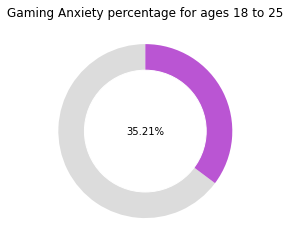

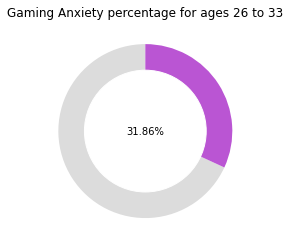

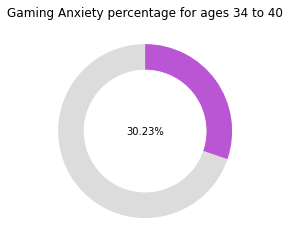

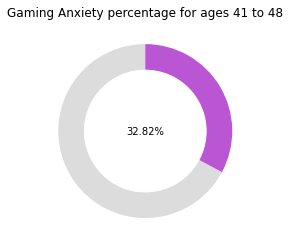

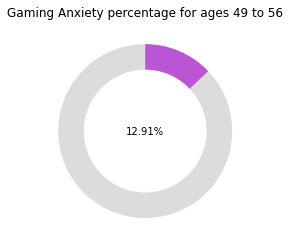

In [15]:
age_groups = list(Gamer_Age_Total.index)
i = 0
for user_group in age_groups:
    # if user_age in i:
    #     user_group = i
    #     break
    plt.figure(i)
    user_row = Gamer_Age_Total.loc[user_group]
    user_data = [100 - user_row['Average Result'], user_row['Average Result']]
    colors = ("gainsboro","mediumorchid") 
    plt.pie(user_data, colors = colors, startangle=90)

    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.text(0,0,"{:.2f}".format(user_row['Average Result']) + "%",
            bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1},
            ha='center', va='center') 
    plt.title("Gaming Anxiety percentage for ages " + str(age_ranges[i][0]) + " to " + str(age_ranges[i][1]))
    i += 1
plt.show()

Based on the data above, the anxiety percentage of the age groups differ only by a small margin. Most of them reached a percentage of around 30% to 35% except for the last age group, 49 to 56, which got only 12.91%. This may be due to several possibilities: the sample size for this category may be too small or perhaps individuals under the said age group are truly more relaxed when gaming. The largest anxiety percent came from the first age group which gained 35.21%. The percentage can still be considered as a low percentage of anxiety, but it can show that the there is still a higher percentage of anxiety amongst younger gamers.

### B. Does&nbsp;the&nbsp;gender&nbsp;of&nbsp;the&nbsp;individual&nbsp;gamer&nbsp;affect&nbsp;gaming&nbsp;anxiety?

Gender may become a factor that can affect gaming anxiety due to the biological aspects and/or different treatment received by different genders. In this portion of the notebook, the gender variable is being investigated as an experimental variable towards the anxiety levels of a gamer. The columns to be used for this question are the `Gender`, `GAD_T`, `SWL_T`, and `SPIN_T` columns. Like the previous problem, `Average Result` is taken by getting the average percentage of the GAD, SWL, and SPIN averages. Since SWL has a negative correlation, the value used for the `Average Result` computation is the reverse of `SWL_Ave` which is taken by subtracting the questionnaire total (`SWL_TOTAL`) from the `SWL_Ave` value.

In [16]:
# Does the gender of the individual gamer affect gaming anxiety?
GamerGender = GameAnxiety[['Gender', 'GAD_T', 'SWL_T', 'SPIN_T']]
GamerGender_total = GamerGender.groupby(['Gender']).sum()
GamerGender_total['Gamers in Category'] = GamerGender.groupby(['Gender']).size()
GamerGender_total['GAD_Ave'] = GamerGender_total['GAD_T'] / GamerGender_total['Gamers in Category']
GamerGender_total['SWL_Ave'] = GamerGender_total['SWL_T'] / GamerGender_total['Gamers in Category']
GamerGender_total['SPIN_Ave'] = GamerGender_total['SPIN_T'] / GamerGender_total['Gamers in Category']
GamerGender_total['Average Result'] = ((GamerGender_total['GAD_Ave']/GAD_TOTAL) + ((SWL_TOTAL - GamerGender_total['SWL_Ave']) / SWL_TOTAL) + (GamerGender_total['SPIN_Ave'] / SPIN_TOTAL)) / 3 * 100

GamerGender_total

,GAD_T,SWL_T,SPIN_T,Gamers in Category,GAD_Ave,SWL_Ave,SPIN_Ave,Average Result
Gender,,,,,,,,
Female,5270,9668,19402.0,692,7.615607,13.971098,28.037572,43.642064
Male,60923,179177,233480.0,12071,5.047055,14.843592,19.342225,34.333134
Other,477,541,1457.0,51,9.352941,10.607843,28.568627,50.397008


For this question, a pie chart is used to visualize which gender experiences more gaming anxiety. As there are three (3) different gender values: Female, Male, and Other, the three aforementioned gender types will be the ones used in the visualization, but the Male and Female types will be used to determine the correlation of gender to gaming anxiety.

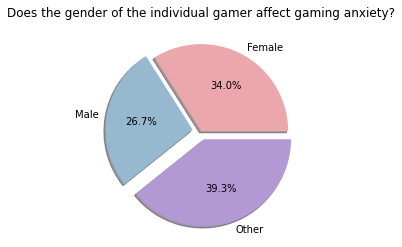

In [17]:
Gender_labels = list(GamerGender_total.index)
Gender_count = GamerGender_total['Average Result']
Gender_colors = ['#EBA7AC', '#96B9D0', '#B399D4']
gender_explode = (0.0, 0.1, 0.1)

plt.pie(Gender_count, labels = Gender_labels, autopct='%1.1f%%', colors = Gender_colors, explode = gender_explode, shadow = True)
plt.title('Does the gender of the individual gamer affect gaming anxiety?')
plt.show()

Based on the visualization of the data, it can be seen that the female gender experience more gaming anxiety than the male gender. This may be due to the different treatment female gamers receive compared to that of males. However, in other studies, it has been observed that women are more likely to be diagnosed with an anxiety disorder than men ([WHO](https://www.who.int/teams/mental-health-and-substance-use/gender-and-women-s-mental-health) and [Texas Health](https://www.texashealth.org/Health-and-Wellness/Behavioral-Health/How-Anxiety-Affects-Men-and-Women-Differently#:~:text=Women%20are%20twice%20as%20likely,than%20men%20(14.3%20percent).)). With this data, it could be said that gender may affect gaming anxiety.

### C. How&nbsp;does&nbsp;the&nbsp;reason&nbsp;for&nbsp;playing&nbsp;affect&nbsp;the&nbsp;gamer’s&nbsp;anxiety&nbsp;levels?

Each gamer may have different reasons for wanting to play games. There were some common reasons such as "To win games", "To relax", or "To improve" in games. There are also some uncommon reasons stated such as "To play with friends" or "To be distracted". The gamer's reason for playing games will serve as the experimental variable for this portion of the notebook. The columns to be used for this question are the `whyplay`, `GAD_T`, `SWL_T`, and `SPIN_T` columns. Like the previous problems, `Average Result` is taken by getting the average percentage of the GAD, SWL, and SPIN averages. Since SWL has a negative correlation, the value used for the `Average Result` computation is the reverse of `SWL_Ave` which is taken by subtracting the questionnaire total (`SWL_TOTAL`) from the `SWL_Ave` value.

In [18]:
# How does the reason for playing (casual, competitive, etc.) affect the gamer’s anxiety levels? 
Gamer_Reason = GameAnxiety[['whyplay', 'GAD_T', 'SWL_T', 'SPIN_T']]
Gamer_Reason_Total = Gamer_Reason.groupby(['whyplay']).sum()
Gamer_Reason_Total['Gamers In Category'] = Gamer_Reason.groupby(['whyplay']).size()
#Gamer_Reason_Total.loc[Gamer_Reason_Total['Gamers In Category'] < 2, 'whyplay'] = "Others"
Gamer_Reason_df = Gamer_Reason_Total.nlargest(5, columns=['Gamers In Category'])

Gamer_Reason_df.loc[len(Gamer_Reason_df)] = [Gamer_Reason_Total.drop(Gamer_Reason_df.index)['GAD_T'].sum(), Gamer_Reason_Total.drop(Gamer_Reason_df.index)['SWL_T'].sum(), Gamer_Reason_Total.drop(Gamer_Reason_df.index)['SPIN_T'].sum(), Gamer_Reason_Total.drop(Gamer_Reason_df.index)['Gamers In Category'].sum()]
Gamer_Reason_df = Gamer_Reason_df.rename(index={5: 'Others'})

Gamer_Reason_df['GAD_Ave'] = Gamer_Reason_df['GAD_T'] / Gamer_Reason_df['Gamers In Category']
Gamer_Reason_df['SWL_Ave'] = Gamer_Reason_df['SWL_T'] / Gamer_Reason_df['Gamers In Category']
Gamer_Reason_df['SPIN_Ave'] = Gamer_Reason_df['SPIN_T'] / Gamer_Reason_df['Gamers In Category']
Gamer_Reason_df['Average Result'] = ((Gamer_Reason_df['GAD_Ave']/GAD_TOTAL) + ((SWL_TOTAL - Gamer_Reason_df['SWL_Ave']) / SWL_TOTAL) + (Gamer_Reason_df['SPIN_Ave'] / SPIN_TOTAL)) / 3 * 100
Gamer_Reason_df
# Gamer_Reason_Total.sort_values(by=['Gamers In Category'], ascending = False)


,GAD_T,SWL_T,SPIN_T,Gamers In Category,GAD_Ave,SWL_Ave,SPIN_Ave,Average Result
whyplay,,,,,,,,
having fun,23720.0,80986.0,98659.0,5164.0,4.593338,15.682804,19.105151,32.564279
improving,24634.0,68553.0,91513.0,4696.0,5.245741,14.598169,19.487436,34.992384
winning,12804.0,27887.0,45891.0,2087.0,6.135122,13.362242,21.988979,39.003598
relaxing,3928.0,8610.0,12776.0,620.0,6.335484,13.887097,20.606452,38.060751
All of the above,572.0,1807.0,2171.0,114.0,5.017544,15.850877,19.043860,33.020828
Others,1012.0,1543.0,3329.0,133.0,7.609023,11.601504,25.030075,44.790232


For this question, a bar graph will be used to compare the questionnaire averages of each group. The analysis will focus more on the values outside of the Others category.

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


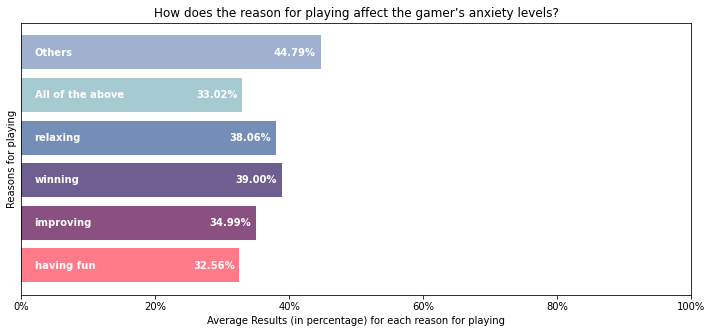

In [19]:
Playing_reasons = list(Gamer_Reason_df.index)
Average_result =  Gamer_Reason_df['Average Result']

# increases bar length and width
plt.figure(figsize=(12,5)) 

reason_for_playing = plt.barh(Playing_reasons, Average_result)
color = ['#FF7B89', '#8A5082', '#6F5F90', '#758EB7', '#A5CAD2', '#a0b0cf']
for i in range(len(Playing_reasons)) :
    c = color[i]
    reason_for_playing [i].set_fc(c)

# increases bar length and width
# plt.rcParams["figure.figsize"] = (20, 5)

plt.title('How does the reason for playing affect the gamer’s anxiety levels?')
plt.ylabel('Reasons for playing')
plt.xlabel('Average Results (in percentage) for each reason for playing')
plt.xlim(0, 100)
plt.gca().set_xticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_xticks()])

# for bar in reason_for_playing:
#   width = bar.get_width() 
#   label_y_pos = bar.get_y() + bar.get_height() / 2
#   plt.text(width, label_y_pos, "{:.2f}".format(width) + "%", va='center')

def autolabel(rects): # https://stackoverflow.com/questions/44491583/how-to-show-values-inside-the-bars-of-a-bargraph
    # attach some text labels
        for ii,rect in enumerate(rects):

            width =  rect.get_width()
            height = rect.get_height()

            yloc1=rect.get_y() + height /2.0
            yloc2=rect.get_y() + height /2.0

            if (width <= 5):
                # Shift the text to the right side of the right edge
                xloc1 = width + 1
                yloc2=yloc2+0.3
                # Black against white background
                clr = 'black'
                align = 'left'
            else:
                # Shift the text to the left side of the right edge
                xloc1 = 0.98*width
                # White on blue
                clr = 'white'
                align = 'right'
            yloc1=rect.get_y() + height /2.0

            plt.text(xloc1,yloc1, "{:.2f}".format(width) + "%", horizontalalignment=align,
                             verticalalignment='center',color=clr,weight='bold',
                             clip_on=True)
            plt.text(2,yloc2, '%s'% (Playing_reasons[ii]),horizontalalignment='left',
                             verticalalignment='center',color=clr,weight='bold',
                             clip_on=True)

autolabel(reason_for_playing)
plt.yticks([]) # hides yticks

plt.show()

As shown in the visualization, individuals who play games with the intention of winning tend to have a higher anxiety rate of 39%. This could be due to the expectation or the need to have good rewards or game statistics. On the other hand, people who are playing to have fun would have a lower percentage of 32.56%. This would make sense as these gamers play to simply enjoy and thus, end up having less pressure on themselves. However, it could be also observed that the percentages of the other categories are not far from each other. This could mean that gaming reasons pose as a minor factor when it comes to gaming anxiety. 

### D. How&nbsp;does&nbsp;the&nbsp;playstyle&nbsp;affect the&nbsp;gamer’s&nbsp;anxiety&nbsp;levels?

A gamer's playstyle could have a major effect on their anxiety. Playstyle refers to the user's preferred type of gameplay. This may range from Singleplayer, Multiplayer - Online, and/or Multiplayer - Offline. This may also determine whether the people they play with can affect the anxiety rate of the gamer. The columns to be used for this question are the `Playstyle`, `GAD_T`, `SWL_T`, and `SPIN_T` columns. Like the previous problems, `Average Result` is taken by getting the average percentage of the GAD, SWL, and SPIN averages. Since SWL has a negative correlation, the value used for the `Average Result` computation is the reverse of `SWL_Ave` which is taken by subtracting the questionnaire total (`SWL_TOTAL`) from the `SWL_Ave` value.

In [20]:
playstyle = GameAnxiety[['Playstyle', 'GAD_T', 'SWL_T', 'SPIN_T']]
playstyle_Total = playstyle.groupby(['Playstyle']).sum()
playstyle_Total['Gamers in Category'] = playstyle.groupby(['Playstyle']).size()

playstyle_df = playstyle_Total.nlargest(4, columns=['Gamers in Category'])

playstyle_df.loc[len(playstyle_df)] = [playstyle_Total.drop(playstyle_df.index)['GAD_T'].sum(), playstyle_Total.drop(playstyle_df.index)['SWL_T'].sum(), playstyle_Total.drop(playstyle_df.index)['SPIN_T'].sum(), playstyle_Total.drop(playstyle_df.index)['Gamers in Category'].sum()]
playstyle_df = playstyle_df.rename(index={4: 'Others'})

playstyle_df['GAD_Ave'] = playstyle_df['GAD_T'] / playstyle_df['Gamers in Category']
playstyle_df['SWL_Ave'] = playstyle_df['SWL_T'] / playstyle_df['Gamers in Category']
playstyle_df['SPIN_Ave'] = playstyle_df['SPIN_T'] / playstyle_df['Gamers in Category']
playstyle_df['Average_Result'] = ((playstyle_df['GAD_Ave']/GAD_TOTAL) + ((SWL_TOTAL - playstyle_df['SWL_Ave']) / SWL_TOTAL) + (playstyle_df['SPIN_Ave'] / SPIN_TOTAL)) / 3 * 100

playstyle_df.sort_values(by=['Gamers in Category'], ascending = False)

,GAD_T,SWL_T,SPIN_T,Gamers in Category,GAD_Ave,SWL_Ave,SPIN_Ave,Average_Result
Playstyle,,,,,,,,
Multiplayer - Online,61785.0,177355.0,235731.0,11942.0,5.173756,14.851365,19.739658,34.720432
Singleplayer,4216.0,9895.0,16200.0,730.0,5.775342,13.554795,22.191781,38.317985
Others,249.0,618.0,794.0,49.0,5.081633,12.612245,16.204082,35.328989
Multiplayer - Offline,195.0,836.0,820.0,48.0,4.062500,17.416667,17.083333,28.804077
All of the above,225.0,682.0,794.0,45.0,5.000000,15.155556,17.644444,33.079573


Like the previous problem, a bar graph will be used to visualize the data calculated. The bar graph will include the five different categories: Multiplayer - Online, Multiplayer - Offline, Singleplayer, All of the Above, and Others. The analysis will not focus on the Others group as it is ambigous. 

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


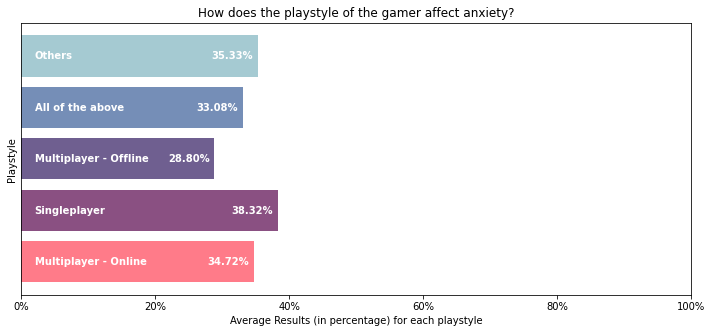

In [21]:
Play_Style = list(playstyle_df.index)
Average_resultPS =  playstyle_df['Average_Result']

# increases bar length and width
plt.figure(figsize=(12,5)) 

style_of_play = plt.barh(Play_Style, Average_resultPS)
color = ['#FF7B89', '#8A5082', '#6F5F90', '#758EB7', '#A5CAD2', '#a0b0cf']
for i in range(len(Play_Style)) :
    c = color[i]
    style_of_play [i].set_fc(c)

# increases bar length and width
# plt.rcParams["figure.figsize"] = (20, 5)

plt.title('How does the playstyle of the gamer affect anxiety?')
plt.ylabel('Playstyle')
plt.xlabel('Average Results (in percentage) for each playstyle')
plt.xlim(0, 100)
plt.gca().set_xticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_xticks()])

# for bar in reason_for_playing:
#   width = bar.get_width() 
#   label_y_pos = bar.get_y() + bar.get_height() / 2
#   plt.text(width, label_y_pos, "{:.2f}".format(width) + "%", va='center')

def autolabel(rects): # https://stackoverflow.com/questions/44491583/how-to-show-values-inside-the-bars-of-a-bargraph
    # attach some text labels
        for ii,rect in enumerate(rects):

            width =  rect.get_width()
            height = rect.get_height()

            yloc1=rect.get_y() + height /2.0
            yloc2=rect.get_y() + height /2.0

            if (width <= 5):
                # Shift the text to the right side of the right edge
                xloc1 = width + 1
                yloc2=yloc2+0.3
                # Black against white background
                clr = 'black'
                align = 'left'
            else:
                # Shift the text to the left side of the right edge
                xloc1 = 0.98*width
                # White on blue
                clr = 'white'
                align = 'right'
            yloc1=rect.get_y() + height /2.0

            plt.text(xloc1,yloc1, "{:.2f}".format(width) + "%", horizontalalignment=align,
                             verticalalignment='center',color=clr,weight='bold',
                             clip_on=True)
            plt.text(2,yloc2, '%s'% (Play_Style[ii]),horizontalalignment='left',
                             verticalalignment='center',color=clr,weight='bold',
                             clip_on=True)

autolabel(style_of_play)
plt.yticks([]) # hides yticks

plt.show()

Based on the graph shown above, the highest anxiety rate is the Singleplayer group with a percentage of 38.32% while the group with the lowest anxiety percentage is Multiplayer - Offline with a value of only 28.80%. This data could serve as evidence that a gamer's playstyle could affect their anxiety. Offline multiplayer would have a low percentage likely due to the co-players residing in the same room as the gamer. In this playstyle, the co-players tend to be friends and/or acquaintances of the player, which may contribute to the player being more comfortable in-game. On the other hand, singleplayer games can be more stressful as players would not often have any co-players to assist them in difficult levels. Many singleplayer are also known to be stress-inducing. With this data, it can be said that the gamer's playstyle is a factor contributing to gaming anxiety.

## IV. Analysis Conclusion

Gaming anxiety occurs after gamers undergo high levels of stress. Stressful gaming could lead to a harmful mental state, which then can lead to anxiety disorders. In this investigation four variables were taken into consideration and tested, whether they play a factor in contributing to a gamer's anxiety. According to the data found, certain age groups, mostly the younger age group, may have more gaming anxiety, but there are only minor differences between the anxiety levels of each age group. Gender proves to have a difference; showing that the female gender experiences more gaming anxiety compared to the male gender. This occurance is most likely due to several biological aspects from each gender. The reasons for gaming the third variable that was tested. The data found here shows that those who play to win ended up having the highest anxiety levels among the other reasons mentioned, but like the age group variable the difference between groups is minor. Lastly, the playstyle of a gamer was observed to result in different anxiety levels, with individuals who typically play offline multiplayer videogames having the lowest anxiety percentage while those who play and prefer singleplayer games were observed to have the highest anxiety levels amongst those who indulge in other styles of play. This may be due to the proximal social interaction when playing offline multiplayer games and the lack of outside and in-game help when playing singleplayer games.

## V. Data Application

The application will have a storytelling or testing type of presentation which features the analysis for the 4 research questions aforementioned. The first page of the app will include a brief overview and introduction to the users of the application that talks briefly about gaming anxiety. Then, the next pages of the app will have the graphs and analysis for each specific research question (1 page = graph/s and analysis for 1 research question). The user can navigate through the different pages and add their preferred filter (age - 2nd page, gender - 3rd page, reason - 4th page, playstyle - 5th page). For each page, a drop-down list or text input box will be provided for the purpose of filtering for their final graph which shows the anxiety rate of the combined variables. The last page would include the user's chart containing the gaming anxiety percentage which has been filtered based on the summarized analysis of key factors that have been identified to contribute to gaming anxiety. It would have filtering for age, gender, reason, and playstyle as these were the factors identified that affects gamers' anxiety.

In [29]:
filter_age = 30
filter_gender = "Male"
filter_reason = "having fun"
filter_playstyle = "Singleplayer"


In [30]:
Filtering = GameAnxiety[['Age', 'Gender', 'whyplay', 'Playstyle',  'GAD_T', 'SWL_T', 'SPIN_T']]
n_age_group = 5
Filtering['Age'] = pd.cut(Filtering['Age'], n_age_group)
age_groups = list(Gamer_Age_Total.index)
for i in age_groups:
    if filter_age in i:
        user_group = i
        break
Filtered_df = Filtering[(Filtering['Age'] == user_group) & (Filtering['Gender'] == filter_gender) & (Filtering['whyplay'] == filter_reason) & (Filtering['Playstyle'] == filter_playstyle)]
Filtered_group_df = Filtered_df.groupby(['Age']).sum()
Filtered_group_df['Gamers In Category'] = Filtered_df.groupby(['Age']).size()
Filtered_group_df['GAD_Ave'] = Filtered_group_df['GAD_T'] / Filtered_group_df['Gamers In Category'] #Higher = more anxiety
Filtered_group_df['SWL_Ave'] = Filtered_group_df['SWL_T'] / Filtered_group_df['Gamers In Category'] #Lower = more anxiety
Filtered_group_df['SPIN_Ave'] = Filtered_group_df['SPIN_T'] / Filtered_group_df['Gamers In Category'] #Higher = more anxiety
Filtered_group_df['Average Result'] = ((Filtered_group_df['GAD_Ave']/GAD_TOTAL) + ((SWL_TOTAL - Filtered_group_df['SWL_Ave']) / SWL_TOTAL) + (Filtered_group_df['SPIN_Ave'] / SPIN_TOTAL)) / 3 * 100
Filtered_group_df

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,GAD_T,SWL_T,SPIN_T,Gamers In Category,GAD_Ave,SWL_Ave,SPIN_Ave,Average Result
Age,,,,,,,,
"(17.962, 25.6]",0,0,0.0,0,NaN,NaN,NaN,NaN
"(25.6, 33.2]",137,560,749.0,33,4.151515,16.969697,22.69697,32.193787
"(33.2, 40.8]",0,0,0.0,0,NaN,NaN,NaN,NaN
"(40.8, 48.4]",0,0,0.0,0,NaN,NaN,NaN,NaN
"(48.4, 56.0]",0,0,0.0,0,NaN,NaN,NaN,NaN


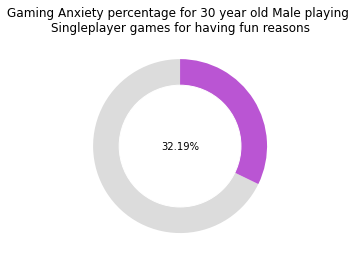

In [31]:
user_row = Filtered_group_df.loc[user_group]
user_data = [100 - user_row['Average Result'], user_row['Average Result']]
colors = ("gainsboro","mediumorchid") 
plt.pie(user_data, colors = colors, startangle=90)

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.text(0,0,"{:.2f}".format(user_row['Average Result']) + "%",
        bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1},
        ha='center', va='center') 
plt.title("Gaming Anxiety percentage for " + str(filter_age) + " year old " + filter_gender + " playing \n" + filter_playstyle + " games for " + filter_reason + " reasons")

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ba4cc4da-7c78-42cc-9baf-f3f47653ed05' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>